# Descente de gradient et entraînement d’un perceptron

Ce notebook couvre :

- **La descente de gradient** sur des fonctions simples (1D et 2D),
- **L’entraînement d’un perceptron** ,
- **Un perceptron différentiable** (sigmoïde + entropie croisée) optimisé par descente de gradient.

> Objectifs pédagogiques :
> - Comprendre l’intuition de la descente de gradient (direction et taille du pas),
> - Visualiser les trajectoires d’optimisation,
> - Implémenter et entraîner un perceptron sur des données linéairement séparables.


In [1]:

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.titlepad'] = 12


## 1. Descente de gradient (fonction convexe 1D)

Nous considérons la fonction de coût : $$J(w) = (w - 2)^2$$

Le gradient (dérivée) est : $$
\frac{dJ}{dw} = 2(w - 2)$$

La mise à jour par descente de gradient est : $$w \leftarrow w - \alpha \frac{dJ}{dw}$$ où $\alpha$ est le **taux d’apprentissage**.


In [2]:
# Descente de gradient 1D

def J(w):
    return (w - 2)**2

def dJ_dw(w):
    return 2*(w - 2)

In [3]:
alpha = 0.25   # taux d'apprentissage
w0 = -2.0      # point de départ
n_steps = 8

ws = [w0]

In [4]:
for t in range(n_steps):
    w = ws[-1] - alpha * dJ_dw(ws[-1])
    ws.append(w)
    print(f"Étape {t+1}: w = {w:.4f}, J(w) = {J(w):.4f}")

Étape 1: w = 0.0000, J(w) = 4.0000
Étape 2: w = 1.0000, J(w) = 1.0000
Étape 3: w = 1.5000, J(w) = 0.2500
Étape 4: w = 1.7500, J(w) = 0.0625
Étape 5: w = 1.8750, J(w) = 0.0156
Étape 6: w = 1.9375, J(w) = 0.0039
Étape 7: w = 1.9688, J(w) = 0.0010
Étape 8: w = 1.9844, J(w) = 0.0002


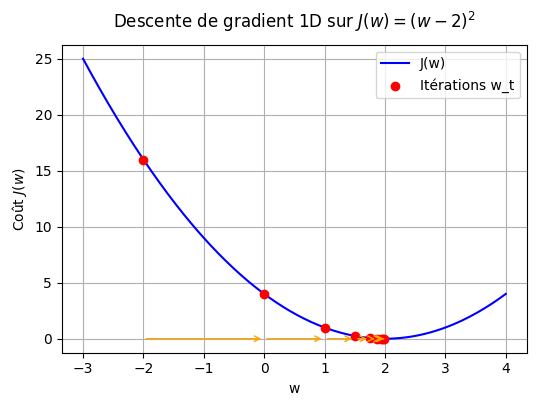

Valeurs w_t: [-2.     0.     1.     1.5    1.75   1.875  1.938  1.969  1.984]


In [5]:

# Trace
xs = np.linspace(-3, 4, 300)
plt.figure()
plt.plot(xs, J(xs), 'b-', label='J(w)')
plt.scatter(ws, J(np.array(ws)), color='red', zorder=3, label='Itérations w_t')
for i in range(len(ws)-1):
    plt.annotate('', xy=(ws[i+1], 0), xytext=(ws[i], 0),
                 arrowprops=dict(arrowstyle='->', color='orange'))
plt.title("Descente de gradient 1D sur $J(w)=(w-2)^2$")
plt.xlabel('w')
plt.ylabel('Coût $J(w)$')
plt.legend(loc='upper right')
plt.show()

print("Valeurs w_t:", np.round(ws, 3))


## 2. Descente de gradient (fonction quadratique 2D)

On considère $$J(\mathbf{w}) = (\mathbf{w} - \mathbf{w}^*)^{T} A (\mathbf{w} - \mathbf{w}^*)$$ avec $A$ **définie positive**.

Le gradient est $$
\nabla J(\mathbf{w}) = 2 A (\mathbf{w} - \mathbf{w}^*)$$ et la mise à jour $$\mathbf{w} \leftarrow \mathbf{w} - \alpha 
\nabla J(\mathbf{w}).$$


In [13]:
# Descente de gradient 2D avec visualisation des contours
A = np.array([[3.0, 1.0], [1.0, 2.0]])
w_star = np.array([1.0, -2.0])

alpha2 = 0.2
w = np.array([-2.0, 2.0])
steps = 20
path = [w.copy()]

In [14]:
for k in range(steps):
    grad = 2 * A @ (w - w_star)
    w = w - alpha2 * grad
    path.append(w.copy())
    print(f"Étape {k+1}: w = {w}, J(w) = {(w - w_star).T @ A @ (w - w_star):.4f}")

path = np.array(path)

Étape 1: w = [0. 0.], J(w) = 7.0000
Étape 2: w = [ 0.4 -1.2], J(w) = 1.4000
Étape 3: w = [ 0.8 -1.6], J(w) = 0.2800
Étape 4: w = [ 0.88 -1.84], J(w) = 0.0560
Étape 5: w = [ 0.96 -1.92], J(w) = 0.0112
Étape 6: w = [ 0.976 -1.968], J(w) = 0.0022
Étape 7: w = [ 0.992 -1.984], J(w) = 0.0004
Étape 8: w = [ 0.9952 -1.9936], J(w) = 0.0001
Étape 9: w = [ 0.9984 -1.9968], J(w) = 0.0000
Étape 10: w = [ 0.99904 -1.99872], J(w) = 0.0000
Étape 11: w = [ 0.99968 -1.99936], J(w) = 0.0000
Étape 12: w = [ 0.999808 -1.999744], J(w) = 0.0000
Étape 13: w = [ 0.999936 -1.999872], J(w) = 0.0000
Étape 14: w = [ 0.9999616 -1.9999488], J(w) = 0.0000
Étape 15: w = [ 0.9999872 -1.9999744], J(w) = 0.0000
Étape 16: w = [ 0.99999232 -1.99998976], J(w) = 0.0000
Étape 17: w = [ 0.99999744 -1.99999488], J(w) = 0.0000
Étape 18: w = [ 0.99999846 -1.99999795], J(w) = 0.0000
Étape 19: w = [ 0.99999949 -1.99999898], J(w) = 0.0000
Étape 20: w = [ 0.99999969 -1.99999959], J(w) = 0.0000


<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mbial\AppData\Local\Temp\ipykernel_47648\2642607824.py:32: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Descente de gradient 2D — Contours de $J(\mathbf{w})$')


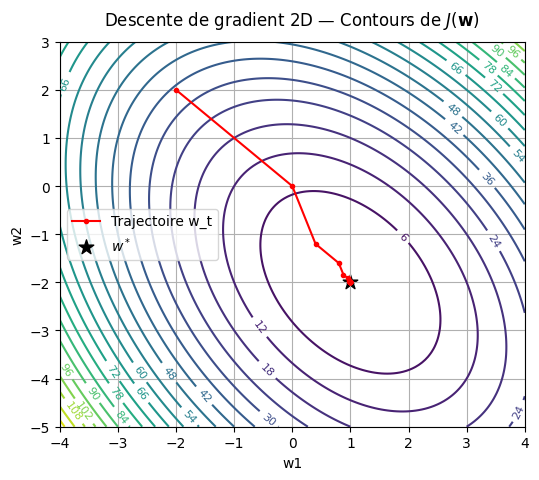

In [ ]:


# Grille pour contours
x = np.linspace(-4, 4, 150)
y = np.linspace(-5, 3, 150)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        wv = np.array([X[i,j], Y[i,j]])
        Z[i,j] = (wv - w_star).T @ A @ (wv - w_star)

plt.figure(figsize=(6,5))
cs = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(cs, inline=True, fontsize=8)
plt.plot(path[:,0], path[:,1], 'r.-', label='Trajectoire w_t')
plt.scatter([w_star[0]], [w_star[1]], color='black', marker='*', s=120, label='$w^*$')
plt.title('Descente de gradient 2D — Contours de $J(\mathbf{w})$')
plt.xlabel('w1')
plt.ylabel('w2')
plt.legend()
plt.show()


## 3. Perceptron (règle de Rosenblatt)

On traite un problème de **classification binaire** ($y \in \{-1, +1\}$) avec un **hyperplan** $\mathbf{w}^	op \mathbf{x} + b = 0$.

**Prédiction perceptron :** $$\hat{y} = \mathrm{sign}(\mathbf{w}^	op \mathbf{x} + b).$$

**Règle de mise à jour (erreur de classification) :** si $y (\mathbf{w}^	op \mathbf{x} + b) \le 0$ alors $$\mathbf{w} \leftarrow \mathbf{w} + \eta\, y\, \mathbf{x}, \quad b \leftarrow b + \eta\, y.$$

> Remarque : cette règle **n’est pas** de la descente de gradient sur une perte différentiable ; c’est la règle historique du perceptron.


In [9]:
# Données synthétiques linéairement séparables
np.random.seed(42)

n_per_class = 50
mean_pos = np.array([2.0, 2.0])
mean_neg = np.array([-2.0, -1.5])
X_pos = np.random.randn(n_per_class, 2) * 0.8 + mean_pos
X_neg = np.random.randn(n_per_class, 2) * 0.8 + mean_neg
X = np.vstack([X_pos, X_neg])
y = np.hstack([np.ones(n_per_class), -np.ones(n_per_class)])

In [10]:
# Perceptron training
eta = 0.1
w = np.zeros(2)
b = 0.0
n_epochs = 20

In [11]:
history = [(w.copy(), b)]
for epoch in range(n_epochs):
    # Shuffle
    idx = np.random.permutation(len(X))
    for i in idx:
        xi, yi = X[i], y[i]
        if yi * (w @ xi + b) <= 0:
            w = w + eta * yi * xi
            b = b + eta * yi
    history.append((w.copy(), b))
    print(f"Époque {epoch+1}: w = {w}, b = {b}")

Époque 1: w = [0.16214099 0.15582631], b = -0.1
Époque 2: w = [0.16214099 0.15582631], b = -0.1
Époque 3: w = [0.16214099 0.15582631], b = -0.1
Époque 4: w = [0.16214099 0.15582631], b = -0.1
Époque 5: w = [0.16214099 0.15582631], b = -0.1
Époque 6: w = [0.16214099 0.15582631], b = -0.1
Époque 7: w = [0.16214099 0.15582631], b = -0.1
Époque 8: w = [0.16214099 0.15582631], b = -0.1
Époque 9: w = [0.16214099 0.15582631], b = -0.1
Époque 10: w = [0.16214099 0.15582631], b = -0.1
Époque 11: w = [0.16214099 0.15582631], b = -0.1
Époque 12: w = [0.16214099 0.15582631], b = -0.1
Époque 13: w = [0.16214099 0.15582631], b = -0.1
Époque 14: w = [0.16214099 0.15582631], b = -0.1
Époque 15: w = [0.16214099 0.15582631], b = -0.1
Époque 16: w = [0.16214099 0.15582631], b = -0.1
Époque 17: w = [0.16214099 0.15582631], b = -0.1
Époque 18: w = [0.16214099 0.15582631], b = -0.1
Époque 19: w = [0.16214099 0.15582631], b = -0.1
Époque 20: w = [0.16214099 0.15582631], b = -0.1


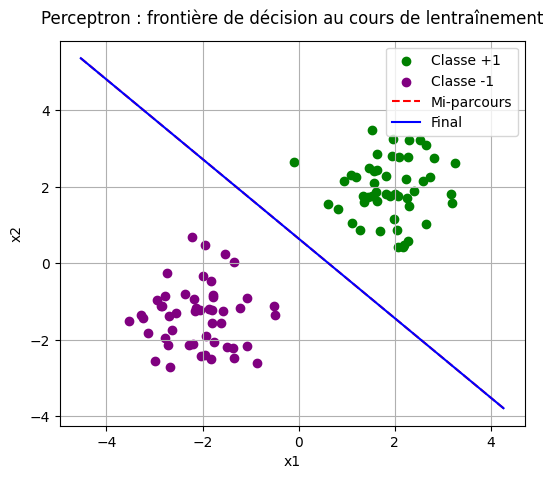

Exactitude finale: 100.0%


In [12]:


# Plot decision boundary over epochs
plt.figure(figsize=(6,5))
plt.scatter(X_pos[:,0], X_pos[:,1], color='green', label='Classe +1')
plt.scatter(X_neg[:,0], X_neg[:,1], color='purple', label='Classe -1')

xx = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200)

def plot_boundary(w, b, style, label):
    # w1 x + w2 y + b = 0 => y = -(w1/w2) x - b/w2
    if abs(w[1]) < 1e-6:
        return  # éviter division par zéro
    yy = -(w[0]/w[1]) * xx - b / w[1]
    plt.plot(xx, yy, style, label=label)

plot_boundary(history[0][0], history[0][1], 'k--', 'Init')
plot_boundary(history[len(history)//2][0], history[len(history)//2][1], 'r--', 'Mi-parcours')
plot_boundary(history[-1][0], history[-1][1], 'b-', 'Final')

plt.title('Perceptron : frontière de décision au cours de lentraînement')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Taux de classification correct
pred = np.sign(X @ w + b)
acc = (pred == y).mean()
print(f"Exactitude finale: {acc*100:.1f}%")


## 4. Perceptron différentiable (sigmoïde + entropie croisée)

On utilise une activation **sigmoïde** $$\sigma(a) = \frac{1}{1 + e^{-a}}$$ et l’**entropie croisée** pour une classification binaire ($y \in \{0,1\}$) :

$$\mathcal{L} = -\frac{1}{N} \sum_{i=1}^N \sigma[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \sigma].$$

**Mise à jour (gradient de la perte) :**

$$\mathbf{w} \leftarrow \mathbf{w} - \alpha \frac{\partial \mathcal{L}}{\partial \mathbf{w}}, \quad b \leftarrow b - \alpha \frac{\partial \mathcal{L}}{\partial b}.$$

> Cela correspond à l’entraînement par descente de gradient du **neurone logistique**.


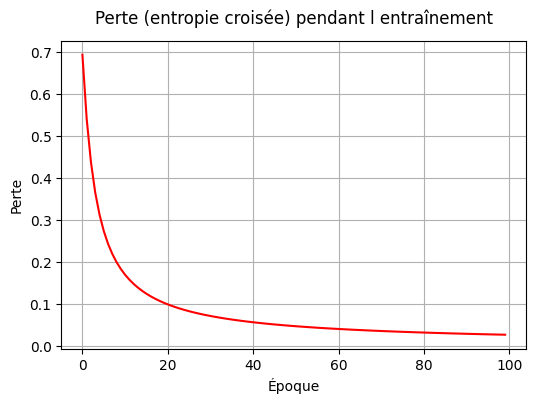

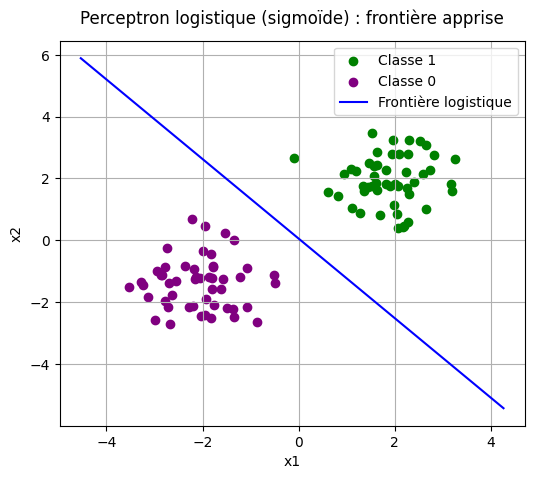

Exactitude finale (logistique): 100.0%


In [8]:

# Préparer labels {0,1}
y01 = (y == 1).astype(float)

# Initialisation
w2 = np.zeros(2)
b2 = 0.0
alpha = 0.1
n_epochs = 100
losses = []

sigmoid = lambda a: 1.0 / (1.0 + np.exp(-a))

for epoch in range(n_epochs):
    a = X @ w2 + b2
    yhat = sigmoid(a)
    # Cross-entropy loss
    eps = 1e-12
    L = -np.mean(y01*np.log(yhat+eps) + (1-y01)*np.log(1-yhat+eps))
    losses.append(L)
    # Gradients
    grad_b = np.mean(yhat - y01)
    grad_w = X.T @ (yhat - y01) / len(X)
    # Update
    w2 -= alpha * grad_w
    b2 -= alpha * grad_b

# Plot loss
plt.figure()
plt.plot(losses, 'r-')
plt.title('Perte (entropie croisée) pendant l entraînement')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.show()

# Frontière finale
plt.figure(figsize=(6,5))
plt.scatter(X_pos[:,0], X_pos[:,1], color='green', label='Classe 1')
plt.scatter(X_neg[:,0], X_neg[:,1], color='purple', label='Classe 0')

if abs(w2[1]) > 1e-6:
    yy = -(w2[0]/w2[1]) * xx - b2 / w2[1]
    plt.plot(xx, yy, 'b-', label='Frontière logistique')

plt.title('Perceptron logistique (sigmoïde) : frontière apprise')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Accuracy finale
pred01 = (sigmoid(X @ w2 + b2) >= 0.5).astype(int)
acc2 = (pred01 == (y==1).astype(int)).mean()
print(f"Exactitude finale (logistique): {acc2*100:.1f}%")


## 5. Bonnes pratiques et variations

- **Taux d’apprentissage ($\alpha$)** : trop grand → divergence, trop petit → convergence lente.
- **Normalisation des données** : centrer / réduire améliore la stabilité.
- **Initialisation** : éviter tous zéros si plusieurs neurones (symétrie).
- **Descente stochastique (SGD)** : mise à jour par mini-lots pour mieux généraliser.
- **Séparabilité** : le perceptron historique converge si les données sont linéairement séparables.

> Exercice : modifiez $\alpha$, le nombre d’époques ou la séparation des classes et observez les effets.
> Implémentez un perception en utilisant les fonctions de pytorch.
